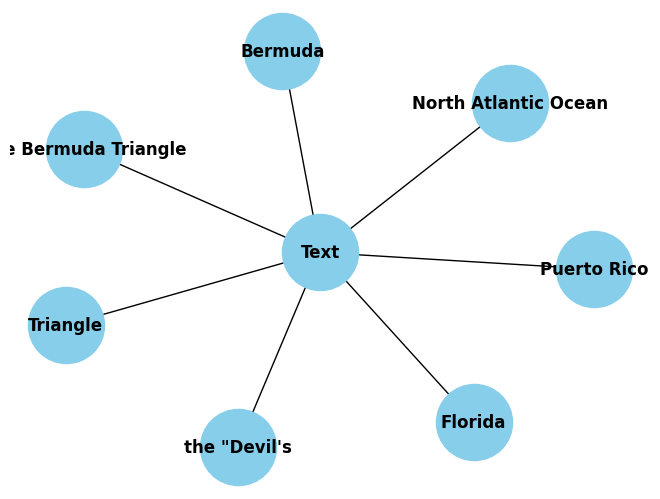

In [13]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to create graph from text
def create_graph_from_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Create an empty graph
    graph = nx.Graph()
    
    # Add nodes for named entities and relationships
    for ent in doc.ents:
        graph.add_node(ent.text, label=ent.label_)
        graph.add_edge('Text', ent.text)  # 'Text' is the central node
    
    return graph

# Example text
text ='''The Bermuda Triangle, also known as the "Devil's Triangle," is a loosely defined area in the western North Atlantic Ocean, roughly bounded by Florida, Bermuda, and Puerto Rico. It's famed for reports of ships and planes mysteriously disappearing, sparking numerous conspiracy theories. However, extensive investigations have found no evidence of unusual activity, attributing incidents to natural phenomena, human error, and misinterpretations. 
Here's a more detailed look:
Location:
The Bermuda Triangle is not an officially recognized location with precise boundaries, but it's generally considered to be in the western North Atlantic Ocean. 
Reputation:
The area is known for reports of ships and planes vanishing without a trace, with some claiming mysterious circumstances. 
Disappearances:
While numerous disappearances have been reported, there's no conclusive evidence of unusual forces at play. 
Possible Explanations:
Disappearances have been attributed to factors like bad weather, equipment malfunction, human error, and even navigational issues. 
Lack of Evidence:
Investigations by government and scientific organizations have found no evidence of paranormal activity or other unusual phenomena in the area. 
Natural Phenomena:
The area is known to experience severe weather, including strong storms and rogue waves, which can contribute to shipwrecks and plane crashes. 
Compass Variations:
There's evidence that the Bermuda Triangle has compass variations, where a magnetic compass may point to "true" north instead of "magnetic" north. 
Misinterpretations:
Some reports of disappearances may be based on misinterpretations of events, such as ships and planes not being spotted on radar or communication errors. '''
graph = create_graph_from_text(text)

# Visualize the graph
nx.draw(graph, with_labels=True, font_size=12, node_size=3000, node_color='skyblue', font_weight='bold')
plt.show()


In [12]:
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


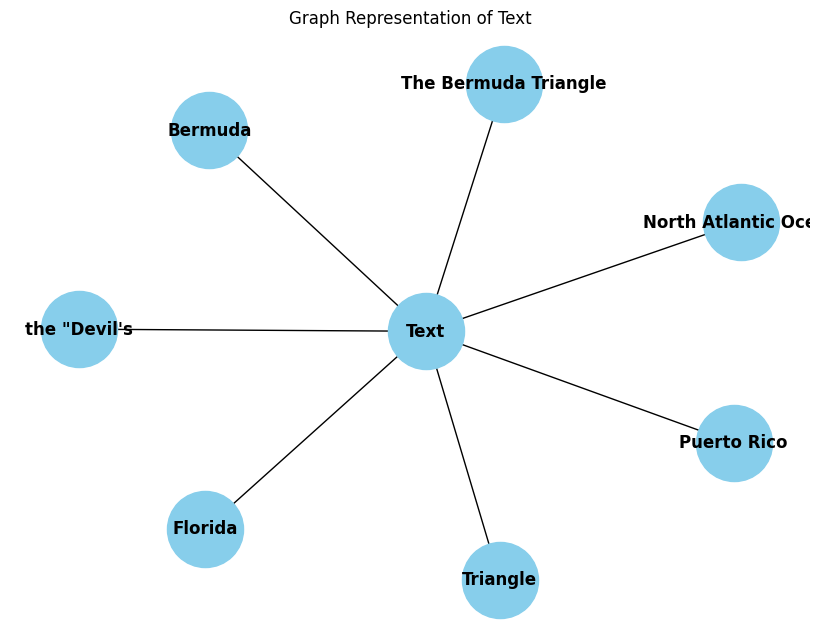

Extracted Entities: ['the "Devil\'s', 'Triangle', 'North Atlantic Ocean', 'Florida', 'Bermuda', 'Puerto Rico', 'The Bermuda Triangle', 'North Atlantic Ocean']
BERT Embeddings (Shape): torch.Size([1, 768])


In [17]:
import spacy
import torch
from transformers import BertTokenizer, BertModel
import networkx as nx
import matplotlib.pyplot as plt

# Load spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to extract named entities using spaCy
def extract_named_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]  # Extract entities
    return entities

# Function to get BERT embeddings for words
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    outputs = bert_model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Use mean pooling of token embeddings
    return embeddings

# Function to create a graph from text
def create_graph_from_text(text):
    # Extract entities using spaCy
    entities = extract_named_entities(text)
    
    # Get BERT embeddings for the entire text
    embeddings = get_bert_embeddings(text)
    
    # Create a graph
    graph = nx.Graph()
    
    # Add a central node 'Text' to represent the entire text
    graph.add_node("Text")
    
    # Add entities as nodes and connect them to 'Text'
    for ent in entities:
        graph.add_node(ent)
        graph.add_edge("Text", ent)  # Link each entity to the central node
    
    # Return the graph and embeddings for visualization
    return graph, embeddings, entities

# Example input text
text = '''The Bermuda Triangle, also known as the "Devil's Triangle," is a loosely defined area in the western North Atlantic Ocean, roughly bounded by Florida, Bermuda, and Puerto Rico. It's famed for reports of ships and planes mysteriously disappearing, sparking numerous conspiracy theories. However, extensive investigations have found no evidence of unusual activity, attributing incidents to natural phenomena, human error, and misinterpretations. 
Here's a more detailed look:
Location:
The Bermuda Triangle is not an officially recognized location with precise boundaries, but it's generally considered to be in the western North Atlantic Ocean. 
Reputation:
The area is known for reports of ships and planes vanishing without a trace, with some claiming mysterious circumstances. 
Disappearances:
While numerous disappearances have been reported, there's no conclusive evidence of unusual forces at play. 
Possible Explanations:
Disappearances have been attributed to factors like bad weather, equipment malfunction, human error, and even navigational issues. 
Lack of Evidence:
Investigations by government and scientific organizations have found no evidence of paranormal activity or other unusual phenomena in the area. 
Natural Phenomena:
The area is known to experience severe weather, including strong storms and rogue waves, which can contribute to shipwrecks and plane crashes. 
Compass Variations:
There's evidence that the Bermuda Triangle has compass variations, where a magnetic compass may point to "true" north instead of "magnetic" north. 
Misinterpretations:
Some reports of disappearances may be based on misinterpretations of events, such as ships and planes not being spotted on radar or communication errors. '''

# Create the graph
graph, embeddings, entities = create_graph_from_text(text)

# Display the graph using NetworkX and Matplotlib
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, font_size=12, node_size=3000, node_color='skyblue', font_weight='bold')
plt.title("Graph Representation of Text")
plt.show()

# Print extracted entities and BERT embeddings (just for checking)
print("Extracted Entities:", entities)
print("BERT Embeddings (Shape):", embeddings.shape)


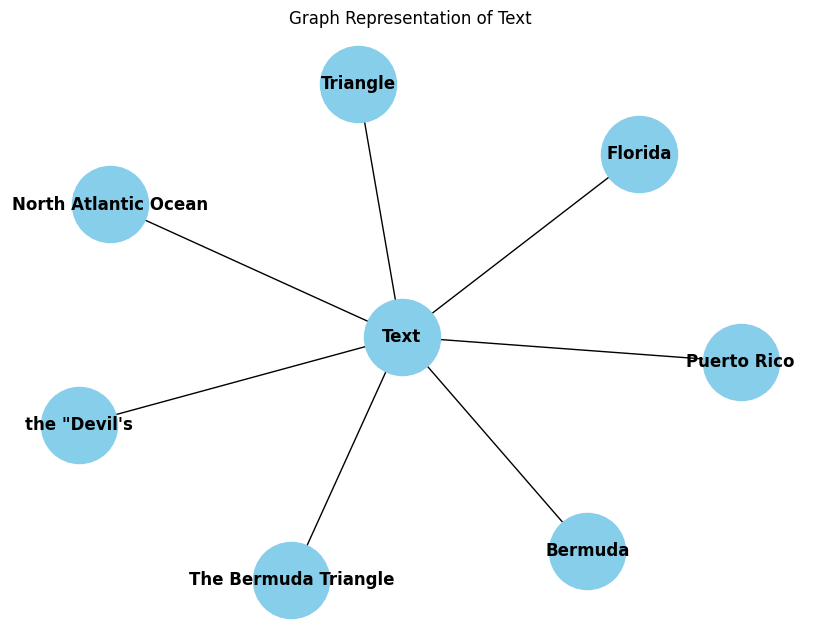

Extracted Entities: ['the "Devil\'s', 'Triangle', 'North Atlantic Ocean', 'Florida', 'Bermuda', 'Puerto Rico', 'The Bermuda Triangle', 'North Atlantic Ocean']
DistilBERT Embeddings (Shape): torch.Size([1, 768])


In [19]:
import spacy
import torch
from transformers import DistilBertTokenizer, DistilBertModel
import networkx as nx
import matplotlib.pyplot as plt

# Load spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Load DistilBERT tokenizer and model (smaller, faster than BERT)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to extract named entities using spaCy
def extract_named_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]  # Extract entities
    return entities

# Function to get DistilBERT embeddings for words
def get_distilbert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    outputs = distilbert_model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Use mean pooling of token embeddings
    return embeddings

# Function to create a graph from text
def create_graph_from_text(text):
    # Extract entities using spaCy
    entities = extract_named_entities(text)
    
    # Get DistilBERT embeddings for the entire text
    embeddings = get_distilbert_embeddings(text)
    
    # Create a graph
    graph = nx.Graph()
    
    # Add a central node 'Text' to represent the entire text
    graph.add_node("Text")
    
    # Add entities as nodes and connect them to 'Text'
    for ent in entities:
        graph.add_node(ent)
        graph.add_edge("Text", ent)  # Link each entity to the central node
    
    # Return the graph and embeddings for visualization
    return graph, embeddings, entities

# Example input text
text = '''The Bermuda Triangle, also known as the "Devil's Triangle," is a loosely defined area in the western North Atlantic Ocean, roughly bounded by Florida, Bermuda, and Puerto Rico. It's famed for reports of ships and planes mysteriously disappearing, sparking numerous conspiracy theories. However, extensive investigations have found no evidence of unusual activity, attributing incidents to natural phenomena, human error, and misinterpretations. 
Here's a more detailed look:
Location:
The Bermuda Triangle is not an officially recognized location with precise boundaries, but it's generally considered to be in the western North Atlantic Ocean. 
Reputation:
The area is known for reports of ships and planes vanishing without a trace, with some claiming mysterious circumstances. 
Disappearances:
While numerous disappearances have been reported, there's no conclusive evidence of unusual forces at play. 
Possible Explanations:
Disappearances have been attributed to factors like bad weather, equipment malfunction, human error, and even navigational issues. 
Lack of Evidence:
Investigations by government and scientific organizations have found no evidence of paranormal activity or other unusual phenomena in the area. 
Natural Phenomena:
The area is known to experience severe weather, including strong storms and rogue waves, which can contribute to shipwrecks and plane crashes. 
Compass Variations:
There's evidence that the Bermuda Triangle has compass variations, where a magnetic compass may point to "true" north instead of "magnetic" north. 
Misinterpretations:
Some reports of disappearances may be based on misinterpretations of events, such as ships and planes not being spotted on radar or communication errors. '''

# Create the graph
graph, embeddings, entities = create_graph_from_text(text)

# Display the graph using NetworkX and Matplotlib
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, font_size=12, node_size=3000, node_color='skyblue', font_weight='bold')
plt.title("Graph Representation of Text")
plt.show()

# Print extracted entities and DistilBERT embeddings (just for checking)
print("Extracted Entities:", entities)
print("DistilBERT Embeddings (Shape):", embeddings.shape)


In [30]:
# Install required libraries
#!pip install spacy pyvis networkx
#!python -m spacy download en_core_web_sm

import spacy
from pyvis.network import Network
import os

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Configuration
TEXT_CLEANING = True  # Set to False to preserve special characters
OUTPUT_FILE = "text_graph.html"

# Input text
text = """
CLIMATE CHANGE AND RESOURCE SCARCITY
Climate Change has been a trend that has been in discussion for a long time, but the fundamental
tenet of this argument has been proved to be true without argument; the current models of
production and consumption are not sustainable. Without significant global action, there are going to
be terrible repercussions.
source:https://www.vtv.gob.ve/wp-content/uploads/2022/06/SEQUIA.png
The growing population and rising food demand with increased income will have an
impact on energy and water. The intertwined nature of climate change and resource scarcity
make the problem more acute with climate already affecting agricultural productivity around the
world. The global demand for water will increase by 40% and that of energy will increase by
50% in the next sixty years. In short, the current economic model is putting a huge strain
on the planet.
The current methods of harnessing the energy and resource-intensive approaches to food production
will no longer be sustainable and businesses will have to look to innovate in this regard. One food
processor and manufacturer in South Africa for example is increasingly becoming a renewable
© 2024 Athena Global Education. All Rights Reserved
energy producer and using poultry and wastewater from production facilities to power its plants.
source:https://climatemigration.org.uk/wp-content/uploads/2015/03/climate_conflict_2.jpg
Alternative Energy: Employment numbers in the renewable industry are increasing at the same
time as the numbers in the fossil fuels sector are declining sharply. Major oil companies are now
talking actively about the transition to a low-carbon economy. Others outside the traditional
energy sector are also taking a significant interest in alternative energy, creating opportunities for
many others to enter a fast-growing market.
source:https://lh3.googleusercontent.com/llpBk7vBgANX5ljabKWi8yNpWCJorNGGNIYfFnz58km_Tn2
xINPYtnv7vyscL9pxa9vHJA=s155
As initiatives around sustainable energy and reducing carbon footprint continue to grow there will be
growing responsibility for businesses to champion these initiatives and not be focused exclusively on
maximizing profits. An essential reorganization of business strategies to include a wider set of
concerns around climate change and sustainable energy will need to take place which would also
require new metrics to measure performance and longer time frames to see a return on Investment.
Becoming a socially responsible organization and participating in creatable sustainable solutions to
global challenges is no longer an option for businesses, but it is the lens through which the perception
of the organization is built in the eyes of the customer, workforce, society, and investors.
© 2024 Athena Global Education. All Rights Reserved
References
UN-ESA https://esa.un.org/unpd/wup/Publications/Files/WUP2014-Highlights.pdf
http://www.marketsandmarkets.com/Market-Reports/smart-cities-market-542.html
1 9 t h A n n u a l C E O S u r v e y ,
http://www.pwc.com/gx/en/ceo-survey/2016/landing-page/pwc-19th-annual-global-ceo-surv
ey.pdf
© 2024 Athena Global Education. All Rights Reserved
TECHNOLOGICAL BREAKTHROUGH
Emerging Technologies in the areas of Artificial Intelligence, the Internet of things, Blockchain,
robotics along other megatrends will create unimaginable impact both in business and society.
Unlike periods of intensive change that have come before like the Industrial Revolution, technology
has no boundaries.
source:https://lh3.googleusercontent.com/MkFreYdZ-wPxoxhy2pzdFOugFjK16iLGqV5yLZR0rA-QMr8
RGJpBN-xxBqmxVc971owggQ=s131
Emerging economies are adopting technology fast; to give an example 12% of Sub Saharan
adults have a mobile wallet account while globally it is less than 2%.
source:https://ocdn.eu/pulscms-transforms/1/t1nk9kpTURBXy9mYmJkOTFkZDE3ZjA2NmFjNGZjMm
U0ZjFjMmQxMmMwOC5qcGeSlQMAAM0Cpc0BfZMFzQMWzQGugaEwBQ
Technology will also have a significant impact on business models with the traditional B2C (Business
to Consumer) characterized by a small group of large corporations serving a multitude of people
being replaced by platform-based models. This will remove the competitive advantage that large
businesses in terms of scale will enable individuals and small businesses to transact in these
platforms and gain equal footing with these large business entities. Production would no longer drive
value and would be built around the unit of the human being and its relative efficiency. This is evident
in the employee-to-value ratios of some of the new-age digital businesses.
The millennial mindset towards technology is another important consideration that businesses of the
future need to be aware of. Social media is not just another channel but is essentially a new way in
which people organize and live their life, creating relationships with themselves, others,
© 2024 Athena Global Education. All Rights Reserved
and with information. Hence businesses should just think about technology in terms of improving
productivity and must use technology as a vehicle to create meaningful relationships with their
customers.
Maturing technologies offer tremendous potential in many industries and will disrupt the status quo,
but their adoption needs to be balanced and organizations need to be careful in adopting technology
and ensure that real value is being created for the large capital investments that some of these
technologies are going to need. Some of the important technologies that future business
leaders need to be aware of are discussed
Artificial Intelligence: Software algorithms that are capable of performing tasks that normally
require human intelligence, such as visual perception, speech recognition, decision-making, and
language translation.
Augmented Reality: Addition of information or visuals to the physical world, via a graphics
and/or audio overlay, to improve the user experience for a task or a product.
source:https://lh3.googleusercontent.com/Vj0Kjml7BqVYCw7Si2ZeLmrXU2CkCPFW8yrWDttWf1P-c-
8_qUMInCGfAo0n95fCwLkOnd8=s139
Blockchain: Distributed electronic ledger that uses software algorithms to record and confirm
transactions with reliability and anonymity.
Drones: Air or water-based devices and vehicles, for example, Unmanned Aerial Vehicles
(UAV), that fly or move without an onboard human pilot. Drones can operate autonomously (via
© 2024 Athena Global Education. All Rights Reserved
on-board computers) on a predefined flight plan or be controlled remotely.
Internet of Things: Network of objects — devices or vehicles, for example — embedded with
sensors, software, network connectivity, and compute capability, that can collect and exchange
data over the Internet. IoT enables devices to be connected and remotely monitored or
controlled.
Robots: Electro-mechanical machines or virtual agents that automate augment or assist
human activities, autonomously or according to set instructions — often a computer program.
Virtual Reality: Computer-generated simulation of a three-dimensional image or a complete
environment, within a defined and contained space (unlike AR), that viewers can interact with in
realistic ways.
3D Printing: Additive manufacturing techniques used to create three-dimensional objects
based on digital models by layering or “printing” successive layers of materials.
Data: Technology will also create huge volumes of data, it is estimated that data production will
be about 44 times by 2020 than it was in 2009. Hence businesses need to create intelligent
systems around leveraging the data into insightful and actionable information; one great enabler in
this direction would be the use of Artificial Intelligence. Advances in semantic engines and
cognitive computing are increasingly enabling machines to ‘think’ for themselves,
interpret and learn rather than follow a set of predetermined commands.
"""

# Preprocess text
if TEXT_CLEANING:
    text = text.encode('ascii', 'ignore').decode('ascii')

# Create network with encoding meta tag
net = Network(
    height="750px",
    width="100%",
    bgcolor="white",
    font_color="black",
    heading='<meta charset="UTF-8"> Text Relationship Graph',
    cdn_resources="remote"
)

# Process text
doc = nlp(text)
entities = set()
relationships = []

# Extract entities and relationships
for sent in doc.sents:
    # Store both entity objects and their text
    sent_entities = [ent for ent in sent.ents if ent.text.strip()]
    
    # Add nodes with proper entity tracking
    for ent in sent_entities:
        if ent.text not in entities:
            color = "#6a9df7" if ent.label_ == "PERSON" else "#f7a46c"
            net.add_node(
                ent.text, 
                label=ent.text,
                title=f"Entity: {ent.text}\nType: {ent.label_}",
                color=color
            )
            entities.add(ent.text)
    
    # Add relationships
    for i in range(len(sent_entities)):
        for j in range(i+1, len(sent_entities)):
            source = sent_entities[i].text
            target = sent_entities[j].text
            relationships.append((source, target))
            net.add_edge(
                source, 
                target,
                title=sent.text,
                label="related",
                color="#808080"
            )

# Physics configuration and display options
net.toggle_hide_edges_on_drag(True)
net.set_options("""
{
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -5000,
      "springLength": 200,
      "springConstant": 0.01,
      "damping": 0.2
    },
    "minVelocity": 0.5,
    "solver": "barnesHut"
  },
  "nodes": {
    "scaling": {
      "min": 16,
      "max": 32
    }
  }
}
""")

# Save with proper encoding
try:
    html = net.generate_html()
    with open(OUTPUT_FILE, 'w', encoding='utf-8') as f:
        f.write(html)
    print(f"Successfully saved graph to {os.path.abspath(OUTPUT_FILE)}")
except Exception as e:
    print(f"Error saving graph: {str(e)}")
    print("Try these solutions:")
    print("1. Update pyvis: pip install --upgrade pyvis")
    print("2. Check file permissions")
    print("3. Verify disk space")

# Auto-open in browser
import webbrowser
webbrowser.open(OUTPUT_FILE)

Successfully saved graph to c:\Users\prati\Downloads\llm course_content_creation_new\text_graph.html


True